## Regularization

In this assignment you will practice using regularization.

Here is our video playlist on the topic of regularization:

https://www.youtube.com/playlist?list=PL0LaMcMQNvEj4y0ieMIWFbHxelZgLdemh

There is also a good discussion of this topic in *Hands-On Machine Learning* and in our textbook *Learning from Data*.

Additionally you have some worksheets in the following Cocalc directories that might be helpful:

```
Slides/Bias-Variance
Slides/Zspace
Slides/Regularization
Activities/RegConcreteExample
```



### Problem 1

Below we will implement regularized linear regression with polynomial features.

Recall that the formula is 

$\bar{w}_{reg} = (X^TX+\alpha A)X^T\bar{y}$

As usual note that many of these products are matrix products for which you need to use the numpy dot operator.  The constant $\alpha$ is a hyperparameter that you will adjust. (In the class meeting we called this parameter $\lambda$ but `lambda` is a reserved Python word).

The matrix $A$ can either be the $(d+1)\times(d+1)$ identity matrix $I$, or the same matrix but with the upper left 1 converted to a 0.  (This depends on whether or not you want to apply regularization to the bias (or intercept) weight).

In numpy $I$ is 

```
np.eye(X.shape[1])
```

assuming that $X$ has a bias column.

To create $A$ you could use


```
A=np.eye(X.shape[1])
A[0][0]=0
```

Read through the code below and look for places that say "You complete me".


In [384]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
random_state = 42
X,y = make_regression(n_samples=10, n_features=1, n_informative=1, n_targets=1, bias=3, effective_rank=None, tail_strength=0.5, noise=4, shuffle=True, coef=False, random_state=random_state)
X[:5]

array([[-0.1382643 ],
       [-0.46947439],
       [ 0.76743473],
       [-0.23413696],
       [-0.23415337]])

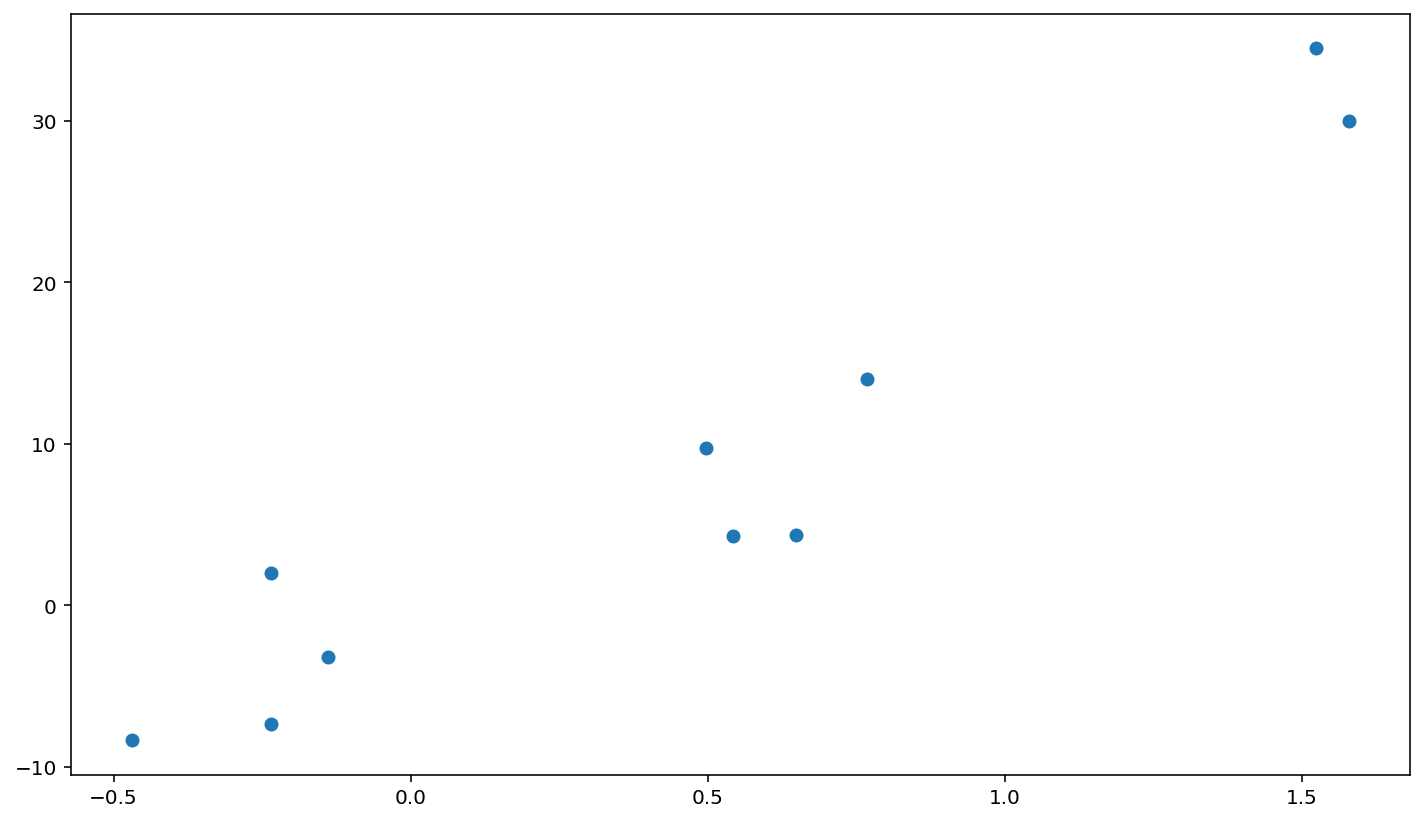

In [385]:
plt.scatter(X[:,-1],y)
plt.show()

In [386]:
## We will work with high dimensional polynomial features

from sklearn.preprocessing import PolynomialFeatures
deg = 10
pf = PolynomialFeatures(deg)
X = pf.fit_transform(X)


### Unregularized linear regression

Below we fit the points using a high degree polynomial, using no regularization.


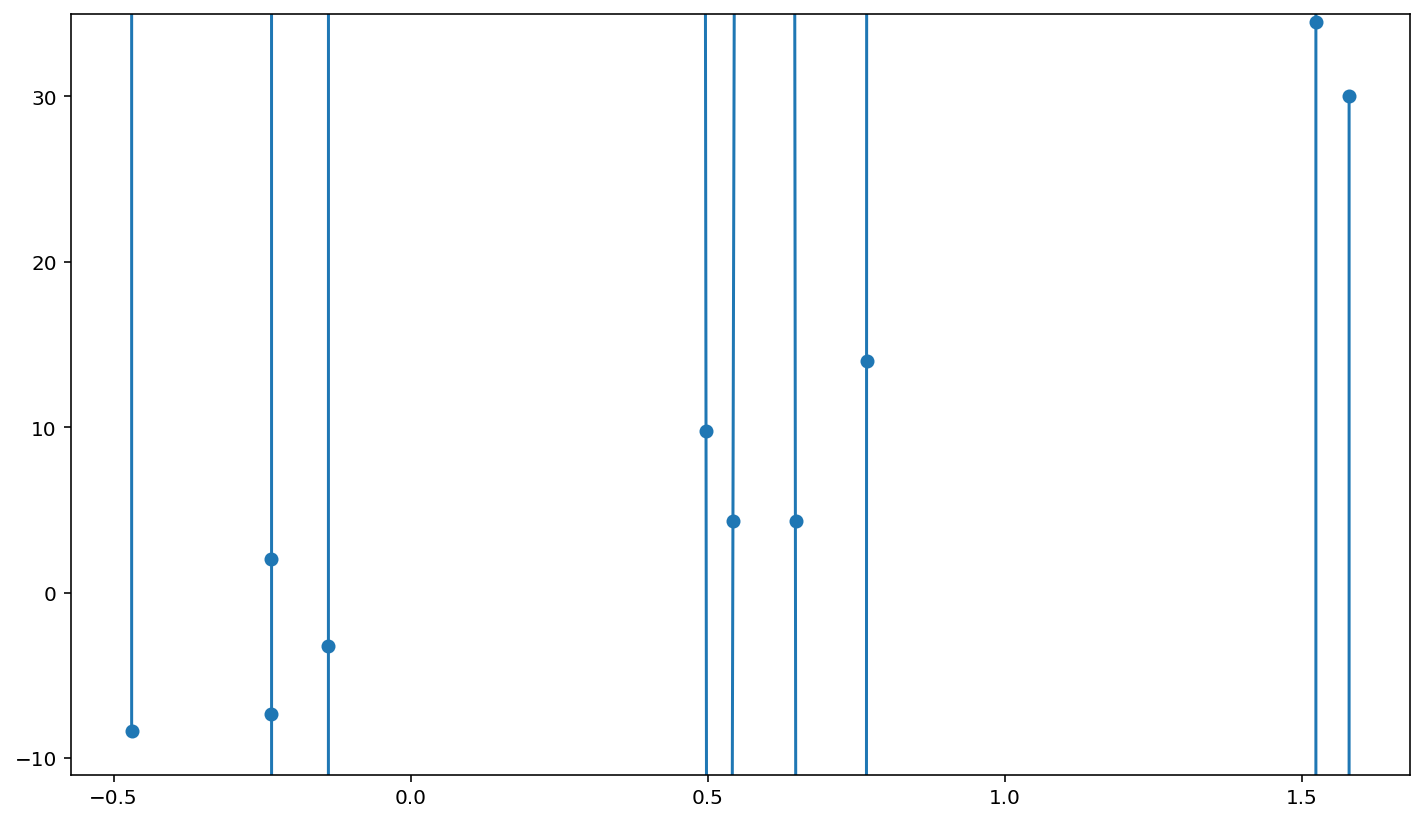

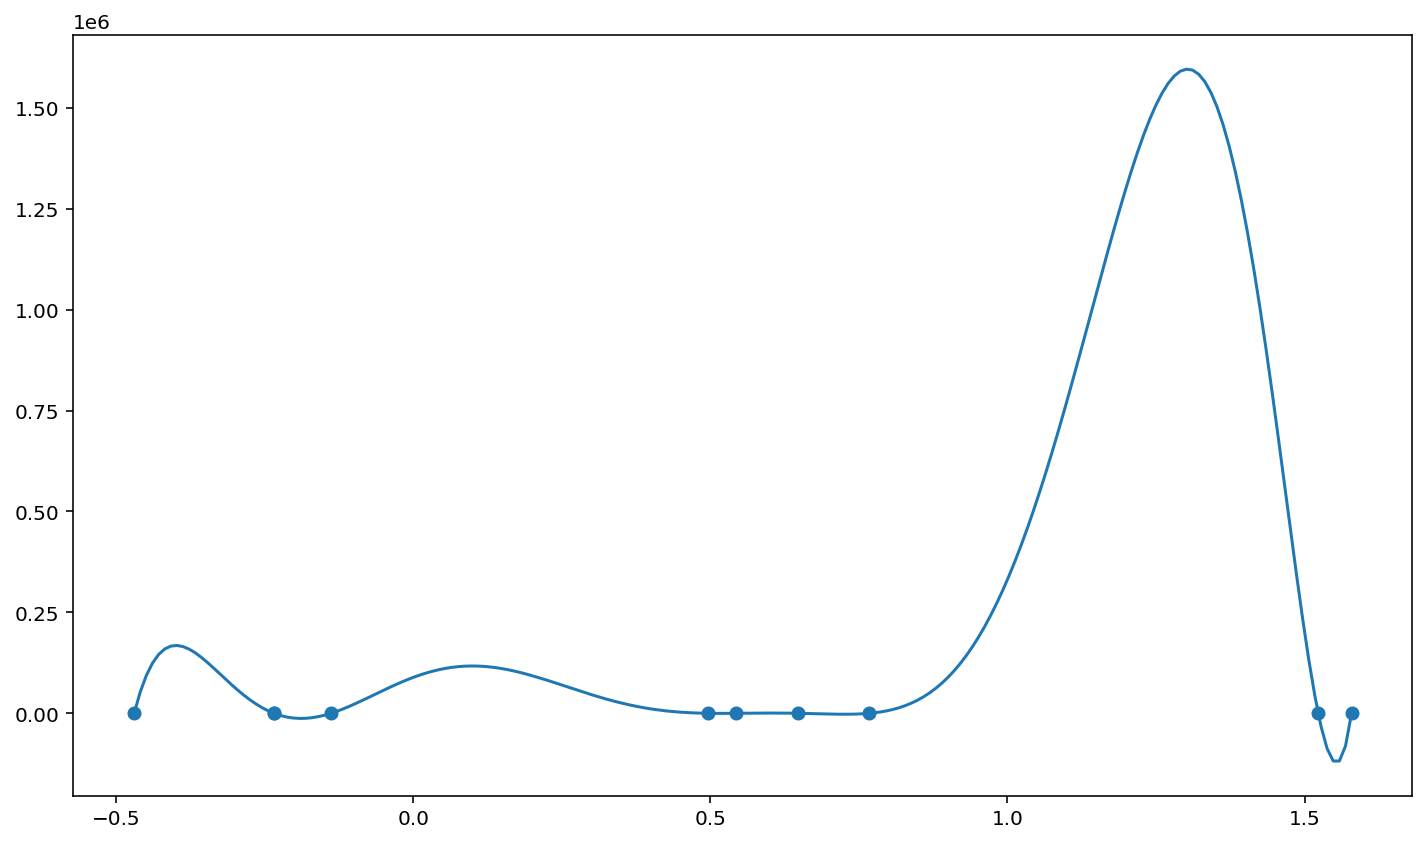

In [387]:
#w = ### You complete me.  Implement regular linear regression using pinv.
w  = np.linalg.pinv(X).dot(y)
xx = np.linspace(min(X[:,1]),max(X[:,1]),num=200)
XX = pf.fit_transform(xx.reshape(-1,1))
curve = XX.dot(w)
plt.plot(xx,curve)
plt.scatter(X[:,1],y)
plt.ylim(-11,35)
plt.show()
plt.plot(xx,curve)
plt.scatter(X[:,1],y)
plt.show()

### Regularized linear regression

Below you need to fill in the missing code to implement regularized linear regression (Ridge regression).  The formula you need is above.

### $\bar{w}_{reg} = ((X^TX+\alpha A)^{-1})X^T\bar{y}$ ###




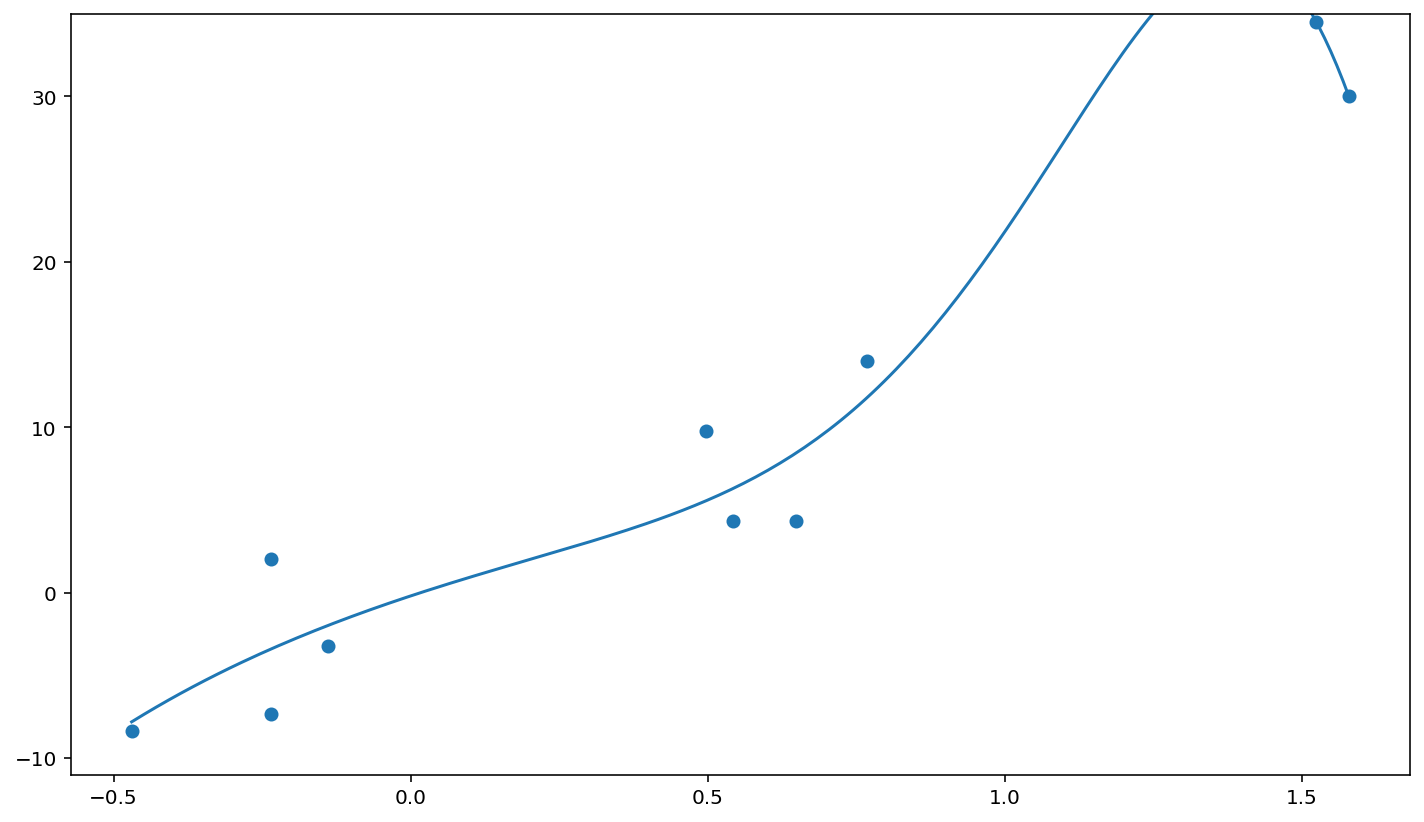

In [388]:
alpha = 10**(-2)
A = np.eye(X.shape[1])
A[0][0]=0

w = np.linalg.pinv((X.T.dot(X) + alpha*A)).dot(X.T).dot(y)


xx = np.linspace(min(X[:,1]),max(X[:,1]),num=200)
XX = pf.fit_transform(xx.reshape(-1,1))
curve = XX.dot(w)
plt.plot(xx,curve)
plt.scatter(X[:,1],y)
plt.ylim(-11,35)
plt.show()


### Real data

Let's try regularized linear regression with polynomial features on some real datasets.



In [389]:
import pandas as pd
df = pd.read_csv("dataset_2193_autoPrice.csv")
print(df.shape)
df.head(30)

(159, 16)


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,class
0,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30,13950
1,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,17450
2,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25,17710
3,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20,23875
4,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.80,101,5800,23,29,16430
5,0,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.80,101,5800,23,29,16925
6,0,188,101.2,176.8,64.8,54.3,2710,164,3.31,3.19,9.00,121,4250,21,28,20970
7,0,188,101.2,176.8,64.8,54.3,2765,164,3.31,3.19,9.00,121,4250,21,28,21105
8,2,121,88.4,141.1,60.3,53.2,1488,61,2.91,3.03,9.50,48,5100,47,53,5151
9,1,98,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.60,70,5400,38,43,6295


In [390]:
X = df.values[:,:-1]
#print(X)
y = df.values[:,-1]

#print(y)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)



ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

X_train = np.c_[np.ones(X_train.shape[0]),X_train]
X_test = np.c_[np.ones(X_test.shape[0]),X_test]

#print(X_train)
#print(X_test)






### Problem 2: Tune up

Find the value of $\alpha$ that gives the best $R^2$ performance on the test set.

Report on the value of $\alpha$ as well as the corresponding $R^2$ score.

Hint:  Not regularizing the bias improves outcomes significantly for this dataset.

Suggestion:  Try $\alpha=2^k$ for $k$ ranging from $-8$ to $8$.


In [391]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error

### You complete me

"""
Problem 2: Tune up
+Find the value of alpha α that gives the best R^2 performance on the test set.
+Report on the value of alpha α as well as the corresponding R^2 score.

+Hint: Not regularizing the bias improves outcomes significantly for this dataset.
+Suggestion: Try alpha = 2^k  for k ranging -8 to 8.
"""



"""
A = np.eye(X.shape[1])
A[0][0]=0
"""

#Using X train
#print(X_train.shape[1])
A = np.eye(X_train.shape[1])

#print(A)
A[0][0]=0 #putting a zero at (0,0) in the matrix
#print(A)

#w  = np.linalg.pinv((X.T.dot(X) + alpha*A)). dot(X.T).dot(y)

for alpha in (2**k for k in range(-8,9)):             #9 as in  = 9-1 = 8  // -8 - 8 
    w  = np.linalg.pinv((X_train.T.dot(X_train) + alpha*A)). dot(X_train.T).dot(y_train)
    y_hat = X_test.dot(w)
    print("The value of *Alpha*,*R^2 Score*, and *Mean Absolute Error* : α (", alpha,") | R2 (", r2(y_test,y_hat),") | MAE (",mean_absolute_error(y_test,y_hat),")")




The value of *Alpha*,*R^2 Score*, and *Mean Absolute Error* : α ( 0.00390625 ) | R2 ( 0.7112251290406393 ) | MAE ( 2032.1664466639281 )
The value of *Alpha*,*R^2 Score*, and *Mean Absolute Error* : α ( 0.0078125 ) | R2 ( 0.7112667159743123 ) | MAE ( 2032.030253528781 )
The value of *Alpha*,*R^2 Score*, and *Mean Absolute Error* : α ( 0.015625 ) | R2 ( 0.7113497487010523 ) | MAE ( 2031.75842331381 )
The value of *Alpha*,*R^2 Score*, and *Mean Absolute Error* : α ( 0.03125 ) | R2 ( 0.7115152526213016 ) | MAE ( 2031.216970557567 )
The value of *Alpha*,*R^2 Score*, and *Mean Absolute Error* : α ( 0.0625 ) | R2 ( 0.7118440381611134 ) | MAE ( 2030.1427658144428 )
The value of *Alpha*,*R^2 Score*, and *Mean Absolute Error* : α ( 0.125 ) | R2 ( 0.7124929045339145 ) | MAE ( 2028.0281577457827 )
The value of *Alpha*,*R^2 Score*, and *Mean Absolute Error* : α ( 0.25 ) | R2 ( 0.7137572034661774 ) | MAE ( 2023.9266922081028 )
The value of *Alpha*,*R^2 Score*, and *Mean Absolute Error* : α ( 0.5 ) |

### Problem 3: LASSO regression

Below we will use gradient descent to implement LASSO regression.

Recall that the error function for LASSO is

$E_{in}(\bar{w}) = MSE(\bar{w}) + \alpha\sum_{i=1}^d |w_i|$

where MSE= Mean Squared Error.

To perform gradient descent we need $\nabla E_{in}$.

This is just 


$\nabla E_{in}(\bar{w}) = \nabla MSE(\bar{w}) + \nabla \alpha\sum_{i=1}^d |w_i|$


For your convenience:

$\nabla MSE(\bar{w}) = \frac{2}{N}(X^TX\bar{w} - X^T\bar{y})$.


What is $\nabla \alpha\sum_{i=1}^d |w_i|$?

This depends on $\frac{d}{dx} |x|$.

That derivative is -1 if $x<0$, and 1 if $x > 0$.  If $x=0$ it is undefined.

But we will make it true by fiat that $\frac{d}{dx} |0| = 0$, even though it isn't really true.

This is an example of a [subderivative](https://en.wikipedia.org/wiki/Subderivative) and it works well in practice.

With this "cheat", notice that $\nabla \alpha\sum_{i=1}^d |w_i| = \alpha sign(\bar{w})$.

Like with ridge regression, you might want to make the first coordinate of the gradient 0 if you do not want to penalize the bias weight.  (For this dataset penalizing the bias actually helps a little).

Finish implementing LASSO below by implementing the gradient `g`.


## $\nabla MSE(\bar{w}) = \frac{2}{N}(X^TX\bar{w} - X^T\bar{y})$. ##
## With this "cheat", notice that $\nabla \alpha\sum_{i=1}^d |w_i| = \alpha sign(\bar{w})$. ##

## Like with ridge regression, you might want to make the first coordinate of the gradient 0 if you do not want to penalize the bias weight.  (For this dataset penalizing the bias actually helps a little). ##

## Finish implementing LASSO below by implementing the gradient `g`. ##

In [392]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error


#gradient g
#you might want to make the first coordinate of the gradient 0 instead of N
"""
X_train.shape (119,16)
X.shape (159, 15)
print (X.T.dot(X).shape) == (15,15)
"""
def g_l1(w,X,y,alpha):
    ## You complete me
    gradient_G = 2/X.shape[0]*(X.T.dot(X).dot(w)-X.T.dot(y)) + alpha*np.sign(w)
    return gradient_G

def grad_descent(w,X,y,gradient,alpha,eta=0.1,max_iter=1000,schedule=10**(-6)):
    """ parameters: w, gradient
    optional: eta (default 0.1) max_iter (default 1000)
    """ 
    history=[]
    history.append(w)
    for i in range(max_iter):
        eta = eta*(1-schedule) ## Decreasing eta over time
        w = w-eta*gradient(w,X,y,alpha)
        history.append(w)
    return w,np.array(history)

# run g first
g = g_l1

for alpha in [2**k for k in [0,1,2,3,4,5,6,7,8,9,10,11,12]]:
    w = np.zeros(X_train.shape[1])
    w,path = grad_descent(w,X_train,y_train,g,alpha,max_iter=3000)
    y_hat = X_test.dot(w)
    print("Reporting on the value of *Alpha* as well as the corresponding *R^2 Score* and *Mean Absolute Error* :    α (", alpha,")  | R2 (", r2(y_test,y_hat),")  | MAE (",mean_absolute_error(y_test,y_hat),")")


Reporting on the value of *Alpha* as well as the corresponding *R^2 Score* and *Mean Absolute Error* :    α ( 1 )  | R2 ( 0.7115431830859413 )  | MAE ( 2030.3150599420442 )


Reporting on the value of *Alpha* as well as the corresponding *R^2 Score* and *Mean Absolute Error* :    α ( 2 )  | R2 ( 0.7118999093214395 )  | MAE ( 2028.327310621571 )
Reporting on the value of *Alpha* as well as the corresponding *R^2 Score* and *Mean Absolute Error* :    α ( 4 )  | R2 ( 0.7126044805476552 )  | MAE ( 2024.3518128800126 )


Reporting on the value of *Alpha* as well as the corresponding *R^2 Score* and *Mean Absolute Error* :    α ( 8 )  | R2 ( 0.7136664711668712 )  | MAE ( 2020.3322387216067 )


Reporting on the value of *Alpha* as well as the corresponding *R^2 Score* and *Mean Absolute Error* :    α ( 16 )  | R2 ( 0.7157487396466317 )  | MAE ( 2012.412278267763 )
Reporting on the value of *Alpha* as well as the corresponding *R^2 Score* and *Mean Absolute Error* :    α ( 32 )  | R2 ( 0.7201989703629005 )  | MAE ( 1997.9918666804347 )


Reporting on the value of *Alpha* as well as the corresponding *R^2 Score* and *Mean Absolute Error* :    α ( 64 )  | R2 ( 0.7275868560286988 )  | MAE ( 1981.212298975433 )
Reporting on the value of *Alpha* as well as the corresponding *R^2 Score* and *Mean Absolute Error* :    α ( 128 )  | R2 ( 0.7420700072102878 )  | MAE ( 1952.7045041472902 )


Reporting on the value of *Alpha* as well as the corresponding *R^2 Score* and *Mean Absolute Error* :    α ( 256 )  | R2 ( 0.7610979651436096 )  | MAE ( 1912.195287682909 )
Reporting on the value of *Alpha* as well as the corresponding *R^2 Score* and *Mean Absolute Error* :    α ( 512 )  | R2 ( 0.7621570128889443 )  | MAE ( 1952.2513599573401 )


Reporting on the value of *Alpha* as well as the corresponding *R^2 Score* and *Mean Absolute Error* :    α ( 1024 )  | R2 ( 0.8039276703959707 )  | MAE ( 1644.5206583570375 )
Reporting on the value of *Alpha* as well as the corresponding *R^2 Score* and *Mean Absolute Error* :    α ( 2048 )  | R2 ( 0.6997807951266672 )  | MAE ( 2013.3572301067688 )


Reporting on the value of *Alpha* as well as the corresponding *R^2 Score* and *Mean Absolute Error* :    α ( 4096 )  | R2 ( 0.2969960058258734 )  | MAE ( 2877.642871086836 )


### Problem 4: LASSO for feature selection

LASSO is famous for eliminating certain features.

Look below and observe that only a few dimensions of the weight vector have values that are significantly above zero.

What are the most important features?

(Hint: be sure to consider the bias weight)

In [393]:

### Please use the values already here rather than rerunning.

alpha=2**10
#print(w)
w = np.zeros(X_train.shape[1])
w,path = grad_descent(w,X_train,y_train,g,alpha,eta=0.1,max_iter=3000,schedule=1/100)



print("alpha :",alpha,"\n\nw :",w)

#copying w to list_w
list_w = w
df.columns[~np.isclose(list_w,0)]

alpha : 1024 

w : [ 1.09304622e+04  4.32599231e-13  2.47778247e+02  1.46160686e-11
  1.17792467e-11  1.65776906e+03  5.56261488e-12  1.83944273e+03
  1.73869530e+03  1.42415849e-12  3.89913396e-12  8.88784656e-13
  7.55945568e-12 -5.11097925e-12 -1.27363709e-11 -7.54546589e-12]


Index(['symboling', 'wheel-base', 'height', 'engine-size', 'bore'], dtype='object')

# Froming looking above, I observed the 5 features are above 0. From running line 16, we are able to see 'symboling', 'wheel-base', 'height', 'engine-size' and 'bore' are the most important features. But I do not think symboling is an important feature? Because the values for "symboling" are from 0 to 2 and it is just a mark or character used as a conventional representation of an object, function, or process. #


### Early stopping

We said that the basic form of regularization is

$$E_{aug}(\bar{w}) = E_{in}(\bar{w}) + \Omega(\bar{w})$$

where $\Omega(\bar{w})$ is some kind of complexity penalty.

So far we've explored using L2 and L1 norms for the complexity penalty.


Consider that as we perform gradient descent we explore a series of weights $\bar{w}_1,\bar{w}_2,\ldots,\bar{w}_{T}$, where the descent process goes on for $T$ iterations.

One way of defining "complexity" for a $\bar{w}_t$ in this list might just be the size of its index $t$.

In other words, as the descent process goes on the $\bar{w}$ become more and more "complex" and might begin to overfit the training data.

In fact this can clearly be seen to happen in real life as the plots below demonstrate.

The best **testing** score encountered often happens early.

It is possible to modify gradient descent so that the process stops when the performance on the test set begins to go down.



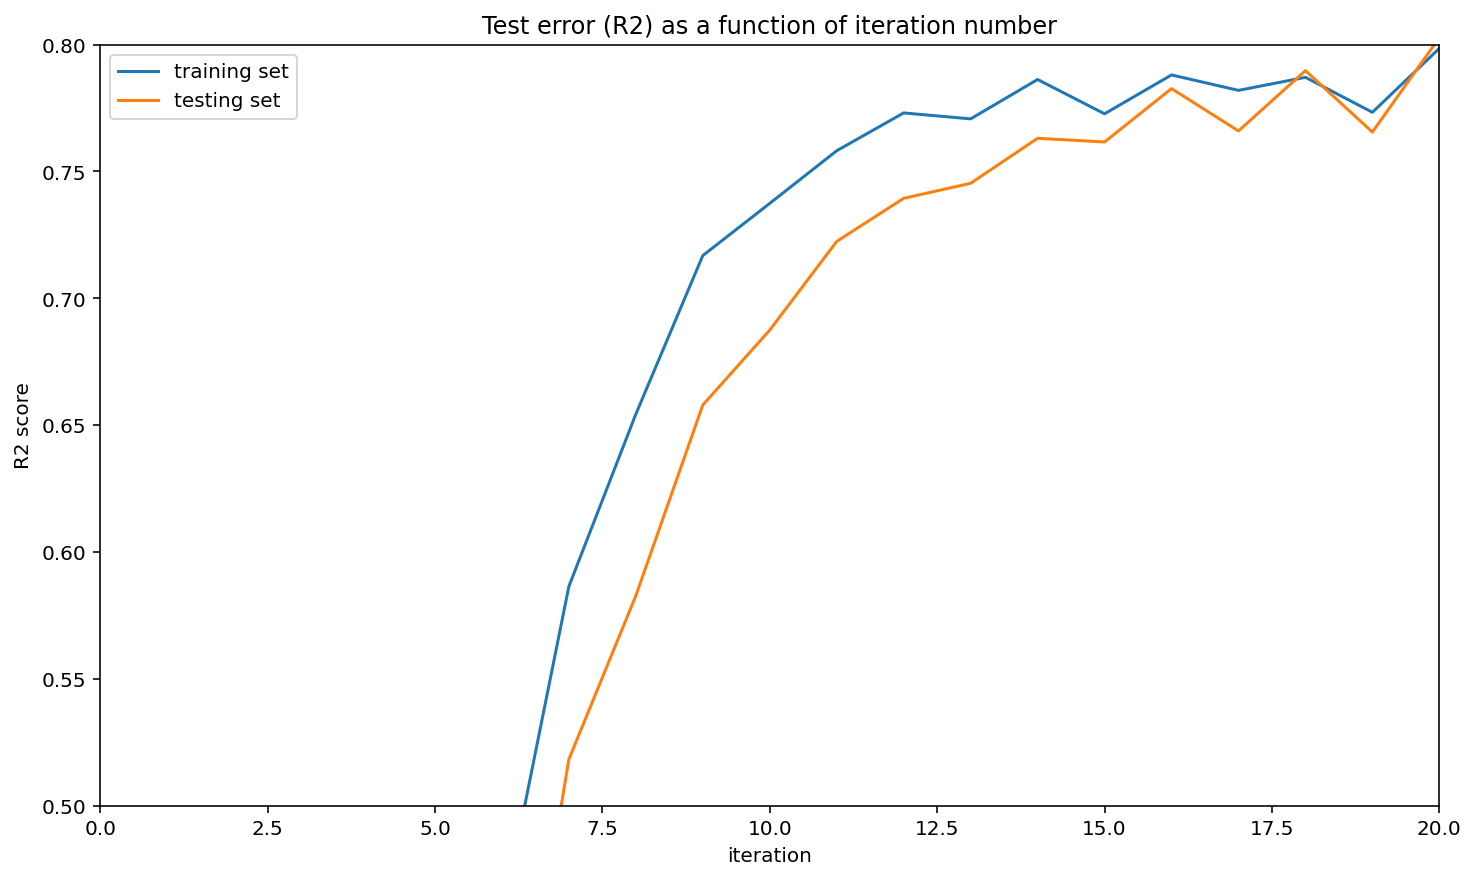

In [394]:
#import numpy as np

np.random.seed(42)

w = np.random.randn(X_train.shape[1])

#alpha is 800??? I was curious what the actual value of alpha is.

w,path = grad_descent(w,X_train,y_train,g_l1,alpha=500,eta=0.1,max_iter=3000,schedule=10**(-3))

#y_test_hats
y_test_hats = [X_test.dot(wp) for wp in path]

#r2scores
r2scores = [r2(yth,y_test) for yth in y_test_hats]

#y_train_hats
y_train_hats = [X_train.dot(wp) for wp in path]

#r2scores_train
r2scores_train = [r2(yth,y_train) for yth in y_train_hats]


num = len(y_test_hats)

plt.plot(range(num),r2scores,label="training set")
plt.plot(range(num),r2scores_train,label="testing set")

plt.ylim(0.5,.8)
plt.xlim(0,20)

plt.title("Test error (R2) as a function of iteration number")
plt.xlabel("iteration")
plt.ylabel("R2 score")

plt.legend()
plt.show()


### Best score vs last score

You can see from the code below that the weight found by gradient descent actually peaked at around the 20th iteration (from the point of view of the test set).

After that the weights began to overfit the training set and test performance began to decrease.


In [395]:
best_weight_index = np.argmax(r2scores)


wbest = path[best_weight_index]


best_score = r2scores[best_weight_index]


print("best score, last score")


best_score, r2scores[-1]


best score, last score


(0.7985062473094278, 0.7573558892529373)

In [396]:
best_weight_index

20

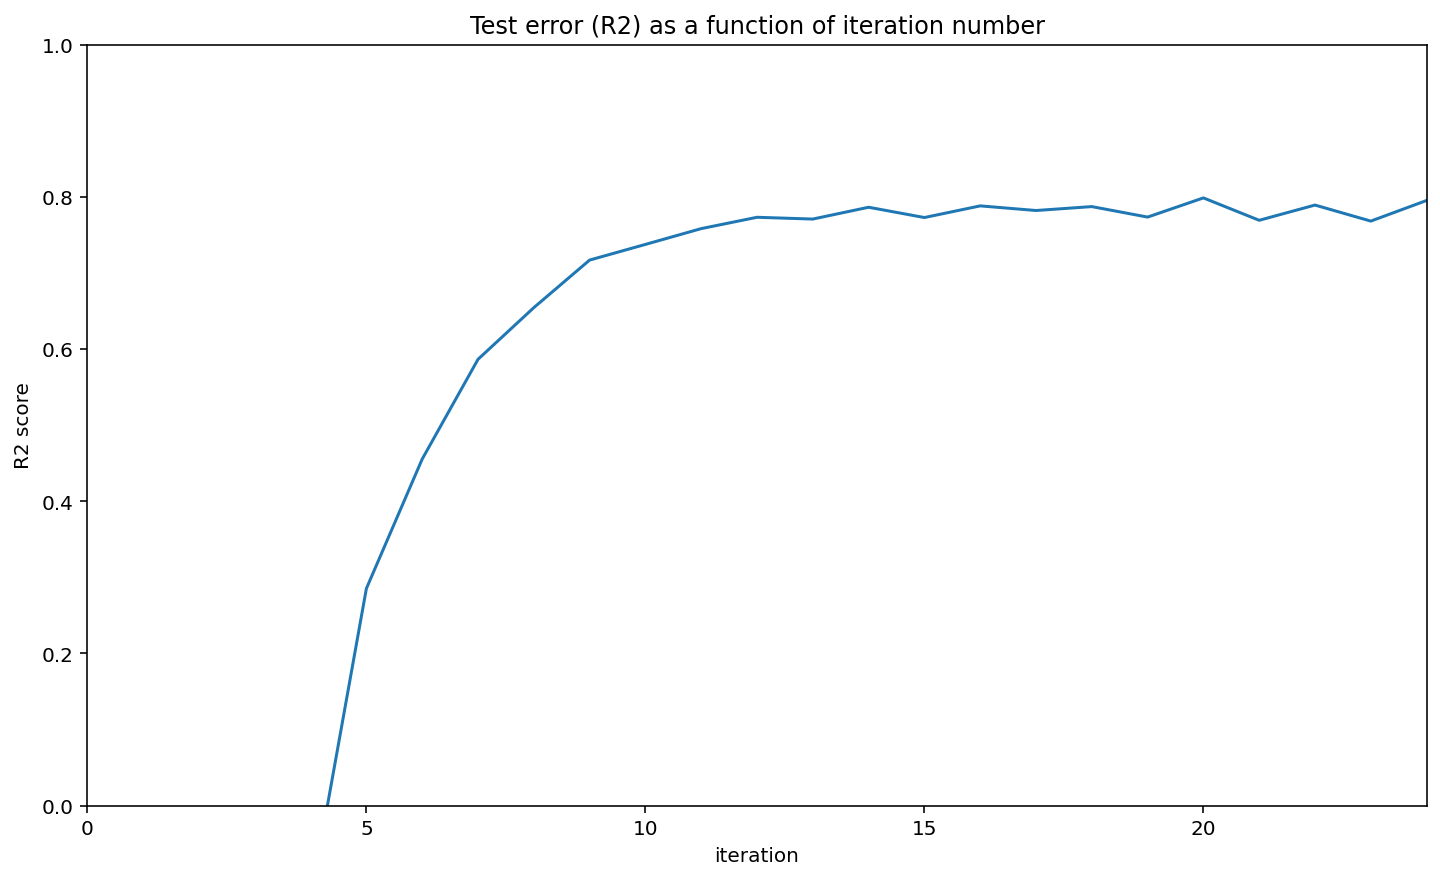

In [397]:
## There is some jitter here, which is typical of LASSO
plt.plot(range(num)[max(best_weight_index-100,0):best_weight_index+100],r2scores[max(best_weight_index-100,0):best_weight_index+100])
plt.ylim(0,1)
plt.xlim(0,24)
plt.title("Test error (R2) as a function of iteration number")
plt.xlabel("iteration")
plt.ylabel("R2 score")
plt.show()

### Implementing early stopping

Implement a version of gradient descent with this signature:

```
def grad_descent_es(w,X_train,y_train,X_test,y_test,metric,gradient,alpha,eta=0.1,max_iter=1000,schedule=10**(-6)):
```

This function should work like regular gradient descent, but it should return the weight $\bar{w}$ that achieves the best performance on `X_test` and `y_test` rather than the last $\bar{w}$ found.

It is okay to stop `grad_descent_es` when test performance begins to degrade.

This function takes the test data as extra parameters as well as a new parameter called `metric`.  This is the function that will be used to evaluate performance.

For example in the case of classification you might do

```
from sklearn.metrics import accuracy_score
metric = lambda yhat,y: 1-accuracy_score(yhat,y)  ### high values are bad
grad_descent_es(w,X_train,y_train,X_test,y_test,metric,gradient,alpha,eta=0.1,max_iter=1000,schedule=10**(-6))
```
(This uses a python [lambda](https://realpython.com/python-lambda/) expression, not the hyperparameter lambda)

On the other hand for regression you could write

```
from sklearn.metrics import mean_squared_error
metric = mean_squared_error   ## high values are bad
grad_descent_es(w,X_train,y_train,X_test,y_test,metric,gradient,alpha,eta=0.1,max_iter=1000,schedule=10**(-6))
```

Within the `grad_descent_es` you can use `metric` like this:

```
performance = metric(y_hat_test,y_test)
```

where `y_hat_test` is the set of predictions the model makes on `X_test`. 


You are welcome to call the existing gradient descent function as a subroutine in this new function.  



Best:  0.8092307097374252 Iteration:  257


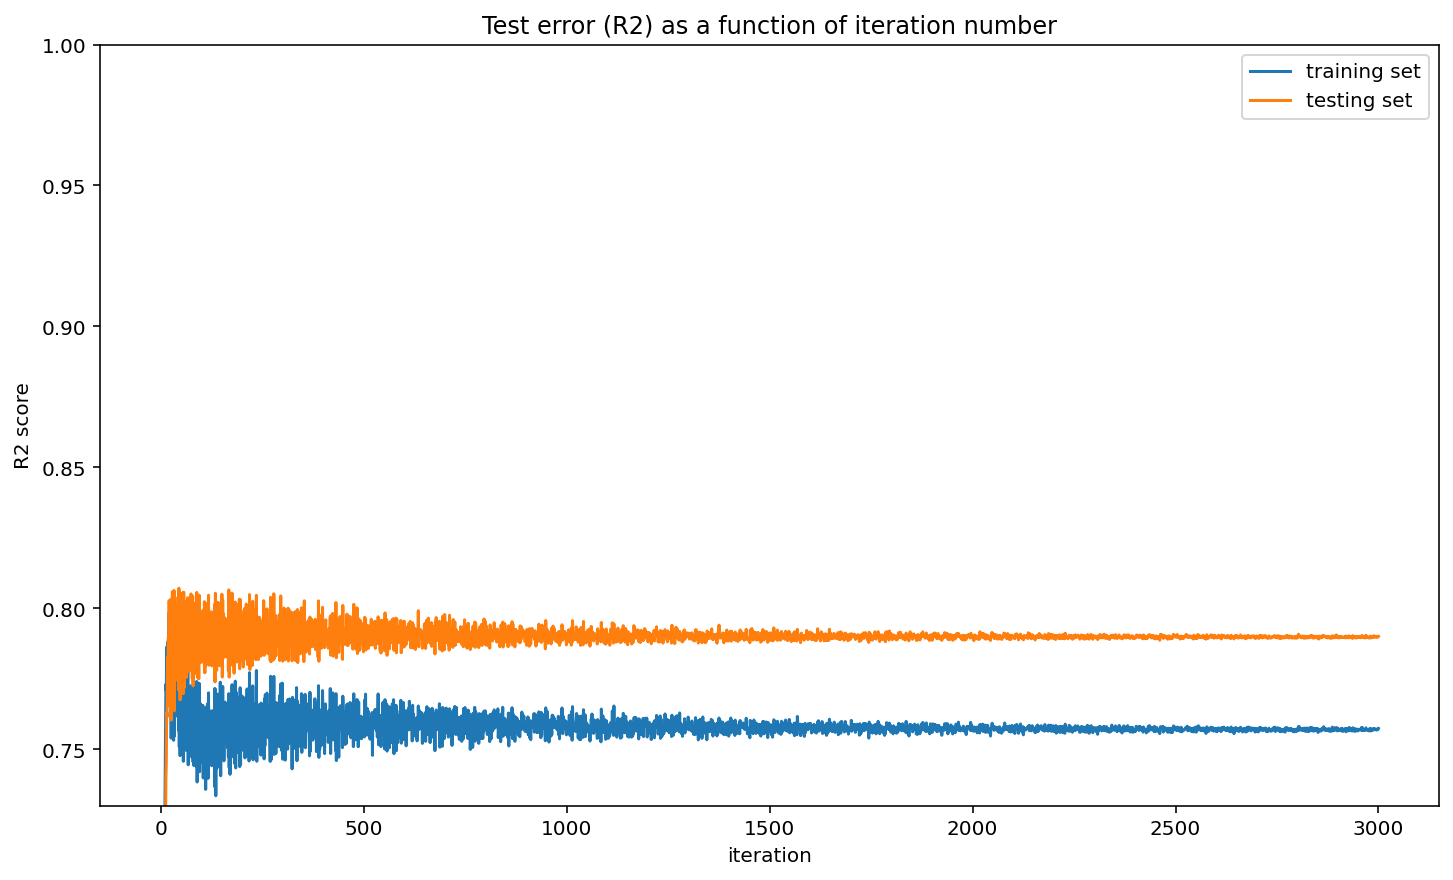

In [412]:
"""
y_test_hats = [X_test.dot(wp) for wp in path]


r2scores = [r2(yth,y_test) for yth in y_test_hats]



y_train_hats = [X_train.dot(wp) for wp in path]
r2scores_train = [r2(yth,y_train) for yth in y_train_hats]

best_weight_index = np.argmax(r2scores)
wbest = path[best_weight_index]
best_score = r2scores[best_weight_index]

1) stop when the trailing 7 iteration average of test performance starts decreasing and return the best performing weight so far
2) stop when the performance is 1% worse than the best performance observed so far and return the best weight yet encountered.

"""
##Regression case


import statistics
from sklearn.metrics import accuracy_score
metric = r2   ## high values are bad
gradient = g_l1

#metric = lambda yhat,y: 1-accuracy_score(yhat,y)   <-- kept throwing error


def grad_descent_es(w,X_train,y_train,X_test,y_test,metric,gradient,alpha=800,eta=0.1,max_iter=3000,schedule=10**(-3)):
    for i in range(max_iter):
        #You are welcome to call the existing gradient descent function as a subroutine in this new function.
        w,path = grad_descent(w,X_train,y_train,gradient=gradient,alpha=alpha,eta=eta,max_iter=max_iter-1,schedule=schedule)
        #after receving the first run grad_descent, we have recieved the last w found from line 24 
        y_test_hats = [X_test.dot(w) for w in path]
        #print("y_test_hats: ",y_test_hats)
        scores = [metric(yth,y_test) for yth in y_test_hats]
        #print("scores: ",scores)
        best_weight_index = np.argmax(scores)
        #print("best_weight_index: ",best_weight_index)
        wbest = path[best_weight_index]  # w,path == w,history 
        #print("wbest: ",wbest)
        if len(scores) >= 7:
            if statistics.mean(scores[-6:-1])<statistics.mean(scores[-7:-2]):
                break
    return path[best_weight_index], best_weight_index


w = np.random.randn(X_train.shape[1])
wbest, iteration = grad_descent_es(w,X_train,y_train,X_test,y_test,metric,gradient,alpha,eta=0.1,max_iter=1000,schedule=10**(-6))
yhat = X_test.dot(wbest)
print("Best: ", r2(yhat, y_test),"Iteration: ",iteration)





num = len(y_test_hats)

plt.plot(range(num),r2scores,label="training set")
plt.plot(range(num),r2scores_train,label="testing set")

plt.ylim(0.73,1)

plt.title("Test error (R2) as a function of iteration number")
plt.xlabel("iteration")
plt.ylabel("R2 score")

plt.legend()
plt.show()

In [399]:
metric = lambda yhat,y: 1-accuracy_score(yhat,y)  ### high values are bad
metric([1,2],[3,4])
#y_hat_test

1.0

Best:  0.8044989303121156 Iteration:  343


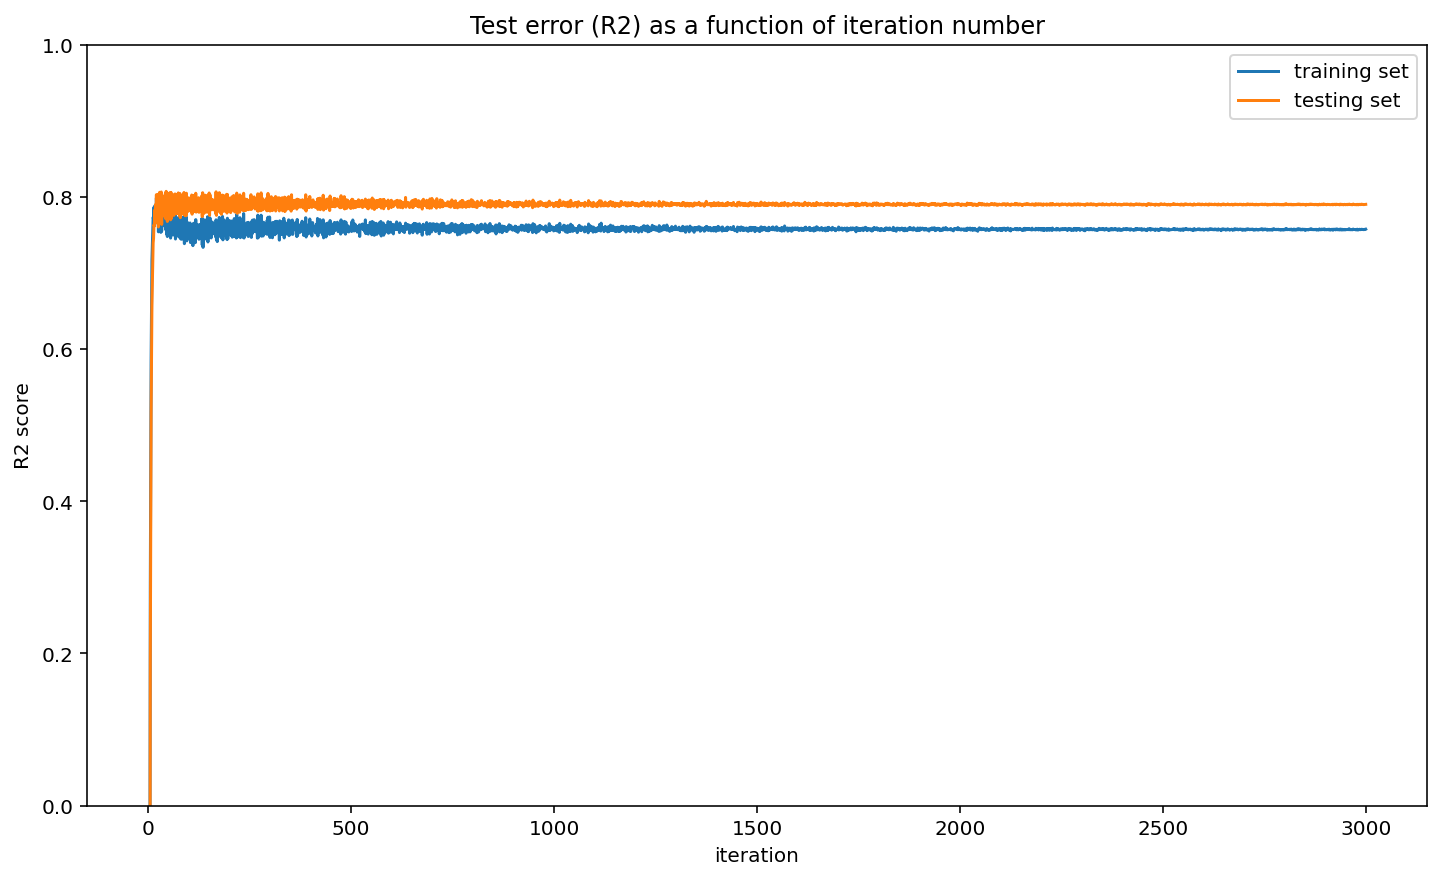

In [408]:

import statistics
from sklearn.metrics import mean_squared_error
metric = mean_squared_error   ## high values are bad
#metric = r2   ## high values are bad
gradient = g_l1

#metric = lambda yhat,y: 1-accuracy_score(yhat,y)   <-- kept throwing error


def grad_descent_es(w,X_train,y_train,X_test,y_test,metric,gradient,alpha=800,eta=0.1,max_iter=3000,schedule=10**(-3)):
    for i in range(max_iter):
        #You are welcome to call the existing gradient descent function as a subroutine in this new function.
        w,path = grad_descent(w,X_train,y_train,gradient=gradient,alpha=alpha,eta=eta,max_iter=max_iter-1,schedule=schedule)
        #after receving the first run grad_descent, we have recieved the last w found from line 24 
        y_test_hats = [X_test.dot(w) for w in path]
        #print("y_test_hats: ",y_test_hats)
        scores = [metric(yth,y_test) for yth in y_test_hats]
        #print("scores: ",scores)
        best_weight_index = np.argmax(scores)
        #print("best_weight_index: ",best_weight_index)
        wbest = path[best_weight_index]  # w,path == w,history 
        #print("wbest: ",wbest)
        if len(scores) >= 7:
            if statistics.mean(scores[-6:-1])<statistics.mean(scores[-7:-2]):
                break
    return path[best_weight_index], best_weight_index


w = np.random.randn(X_train.shape[1])
wbest, iteration = grad_descent_es(w,X_train,y_train,X_test,y_test,metric,gradient,alpha,eta=0.1,max_iter=1000,schedule=10**(-6))
yhat = X_test.dot(wbest)
print("Best: ", r2(yhat, y_test),"Iteration: ",iteration)





num = len(y_test_hats)

plt.plot(range(num),r2scores,label="training set")
plt.plot(range(num),r2scores_train,label="testing set")

plt.ylim(0,1)

plt.title("Test error (R2) as a function of iteration number")
plt.xlabel("iteration")
plt.ylabel("R2 score")

plt.legend()
plt.show()